# PROJET: Detection de fraude

#Preparation du dataset

Import des librairies usuelles

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sklearn
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import des datasets

In [0]:
Fraud_Data = pd.read_csv("Fraud_Data.csv")
IpAddress_to_Country = pd.read_csv("IpAddress_to_Country.csv")

In [3]:
Fraud_Data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
IpAddress_to_Country.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
Fraud_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
IpAddress_to_Country.lower_bound_ip_address = IpAddress_to_Country.lower_bound_ip_address.astype(int)
IpAddress_to_Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   lower_bound_ip_address  138846 non-null  int64 
 1   upper_bound_ip_address  138846 non-null  int64 
 2   country                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


Creation d'une colonne Pays

In [0]:
# Fonction pour amener le nom des pays du dataset secondaire vers le dataset principal
def transform_ip(arg) :
    try :
        return IpAddress_to_Country.country[(IpAddress_to_Country.lower_bound_ip_address < arg) & (IpAddress_to_Country.upper_bound_ip_address > arg)].iloc[0]
    except IndexError :
        return "Pays inconnu"  
Fraud_Data["Pays"] = Fraud_Data.ip_address.apply(transform_ip)

In [8]:
Fraud_Data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Pays
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [0]:
dataset = Fraud_Data.copy()

Creation d'une colonne DeviceGroup

In [10]:
devicegroup = dataset.groupby("device_id").mean()
devicegroup["device_id"] = devicegroup.index
devicegroup = devicegroup.reset_index(drop=True)
devicegroup.sort_values(by="class", ascending=False)

,user_id,purchase_value,age,ip_address,class,device_id
35389,60126.0,19.0,28.0,2.764869e+09,1.0,GRZJSVOZZGVCJ
16481,145555.0,67.0,37.0,2.250499e+09,1.0,DCRMMDOIBYDMR
91148,272322.5,43.5,32.5,1.366578e+09,1.0,RFBQCXGNPFCAS
32182,369638.0,48.0,27.0,1.909780e+09,1.0,GBZNVCDXTKKXF
49304,264118.0,80.0,34.0,2.078159e+09,1.0,JIREGYLRRFTKU
...,...,...,...,...,...,...
47156,176763.0,37.0,58.0,4.501174e+08,0.0,IYNDPXPSVESAO
47155,174304.0,61.0,25.0,2.907354e+09,0.0,IYNCVVXLMSAED
47154,260859.0,35.0,31.0,2.370404e+09,0.0,IYMNSSFJRZBDR
47153,90680.0,31.0,28.0,1.655478e+09,0.0,IYLZGOHLYMTXV


In [11]:
devicegroup["devicegroup"]=devicegroup["class"].apply(lambda X: 1 if X<=0.2 else 2 if 0.2<X<=0.4 else 3 if 0.4<X<=0.6 else 4 if 0.6<X<=0.8 else 5)
devicegroup.head()

,user_id,purchase_value,age,ip_address,class,device_id,devicegroup
0,226648.000000,45.0,34.0,2.494581e+09,0.000000,AAALBGNHHVMKG,1
1,103319.000000,94.0,29.0,8.092637e+08,0.000000,AAAWIHVCQELTP,1
2,36633.000000,46.0,40.0,2.891497e+06,0.000000,AAAXJHWCLISKY,1
3,222337.818182,57.0,36.0,1.377849e+09,0.909091,AAAXXOZJRZRAO,5
4,344305.000000,10.0,25.0,3.960443e+09,0.000000,AABFGRPBQHWFQ,1


In [0]:
dataset = pd.merge(right=devicegroup[["devicegroup","device_id"]], left=dataset, left_on = "device_id", right_on = "device_id")

Ajout de colonnes qui indique l'heure, le jour, le mois, le jour de la semaine et le temps entre l'inscription et la commande

In [0]:
import datetime
from datetime import timedelta
today = datetime.datetime.today()
from dateutil import parser

dataset["purchase_hour"] = dataset.purchase_time.apply(lambda X : parser.parse(X).hour)
dataset["purchase_month"] = dataset.purchase_time.apply(lambda X : parser.parse(X).month)
dataset["purchase_day"] = dataset.purchase_time.apply(lambda X : parser.parse(X).day)
dataset["purchase_weekday"] = dataset.purchase_time.apply(lambda X : parser.parse(X).weekday())
dataset["timedelta_h"] = dataset.apply(lambda X : (parser.parse(X["purchase_time"]) - parser.parse(X["signup_time"])).total_seconds()/3600,axis=1)

In [14]:
dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,Pays,devicegroup,purchase_hour,purchase_month,purchase_day,purchase_weekday,timedelta_h
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,1,2,4,18,5,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,1,1,6,8,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,5,18,1,1,3,0.000278
3,48288,2015-01-01 18:52:41,2015-01-01 18:52:42,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,5,18,1,1,3,0.000278
4,128706,2015-01-01 18:52:40,2015-01-01 18:52:41,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,5,18,1,1,3,0.000278


Taux de transactions frauduleuses

In [0]:
fraudulent_purchase = Fraud_Data[Fraud_Data["class"]==1]
normal_purchase = Fraud_Data[Fraud_Data["class"]==0]

In [16]:
print("Il y a {}% de transactions frauduleuses dans le dataset".format(round(len(fraudulent_purchase)/len(normal_purchase)*100,1)))

Il y a 10.3% de transactions frauduleuses dans le dataset


#Data Visualisation

In [17]:
print("Les pays d'ou proviennent le plus de fraudes:")
fraudulent_purchase.Pays.value_counts()[0:11]

Les pays d'ou proviennent le plus de fraudes:


United States        5551
Pays inconnu         1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Italy                 166
Name: Pays, dtype: int64

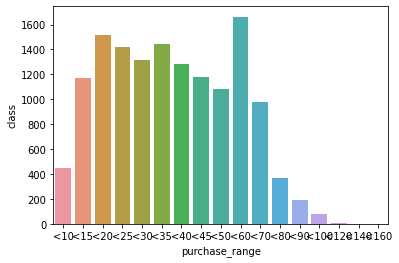

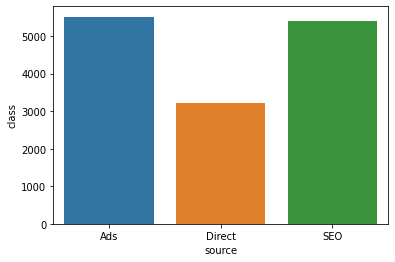

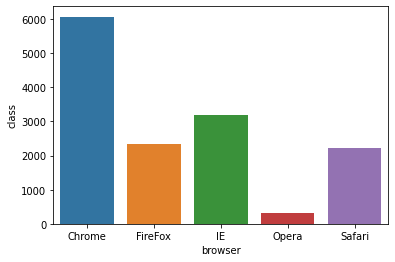

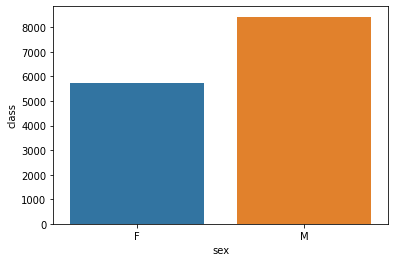

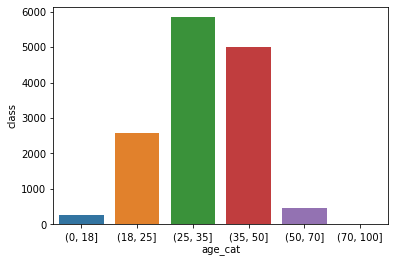

In [18]:
dataset["age_cat"]=pd.cut(x=dataset['age'], bins=[0,18, 25, 35, 50, 70, 100])
dataset["purchase_range"]=pd.cut(x=dataset['purchase_value'], bins=[0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 120, 140, 160], labels=["<10", "<15", "<20", "<25", "<30", "<35", "<40", "<45", "<50", "<60", "<70", "<80", "<90", "<100", "<120", "<140", "<160"])

columns = ["purchase_range","source","browser","sex","age_cat"]

for column in columns:
  dataplot = dataset.groupby(column).sum()
  sns.barplot(x=dataplot.index,y=dataplot["class"])
  plt.show()

In [19]:
print('Les pays les plus fraudeurs:')
top_fraud_country = fraudulent_purchase.groupby("Pays").mean()
top_fraud_country = top_fraud_country[top_fraud_country["class"]==1]
top_fraud_country

Les pays les plus fraudeurs:


,user_id,purchase_value,age,ip_address,class
Pays,,,,,
Afghanistan,198149.000000,18.000000,24.000000,3.528474e+09,1.0
Algeria,208068.615385,39.538462,30.153846,1.914113e+09,1.0
Angola,312447.000000,21.000000,38.000000,1.772829e+09,1.0
Argentina,196974.257576,27.272727,29.469697,3.022684e+09,1.0
Armenia,314942.000000,33.000000,32.500000,3.403260e+09,1.0
...,...,...,...,...,...
Uruguay,234589.400000,31.800000,32.400000,2.952779e+09,1.0
Uzbekistan,179859.000000,28.500000,36.500000,1.502762e+09,1.0
Venezuela,190089.181818,38.666667,27.242424,2.915862e+09,1.0


(0.03805555555555556, 2879.992222222222)

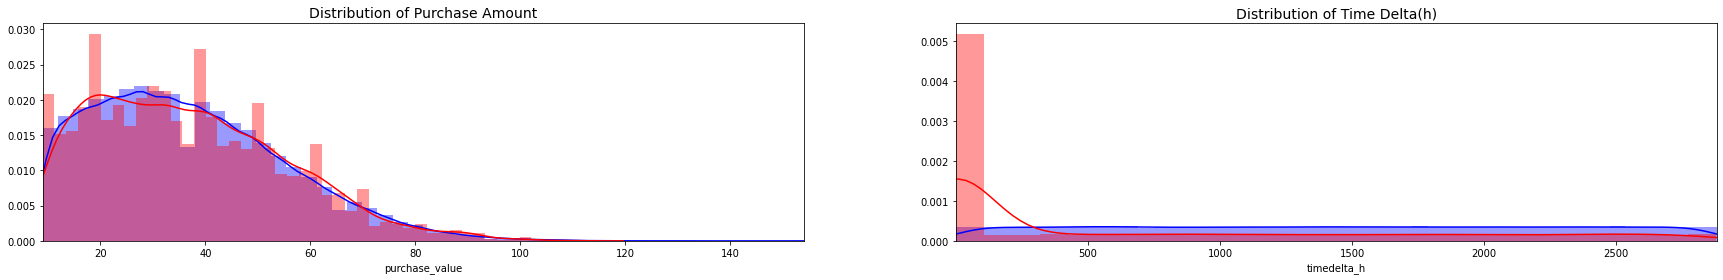

In [20]:
fraudulent_purchase = dataset[dataset["class"]==1]
normal_purchase = dataset[dataset["class"]==0]

fig, ax = plt.subplots(1, 2, figsize=(30,4))
normal_purchase = dataset[dataset["class"]==0]

amount_fraud = fraudulent_purchase['purchase_value']
time_fraud = fraudulent_purchase['timedelta_h']
amount_norm = normal_purchase.purchase_value
time_norm = normal_purchase.timedelta_h

sns.distplot(normal_purchase.purchase_value, ax=ax[0], color='b')
sns.distplot(fraudulent_purchase['purchase_value'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Purchase Amount', fontsize=14)
ax[0].set_xlim([min(amount_norm), max(amount_norm)])

sns.distplot(time_norm, ax=ax[1], color='b')
sns.distplot(time_fraud, ax=ax[1], color='r')
ax[1].set_title('Distribution of Time Delta(h)', fontsize=14)
ax[1].set_xlim([min(time_norm), max(time_norm)])

#Feature Engineering

In [44]:
df = dataset.drop(["user_id", "device_id", "signup_time", "purchase_time", "ip_address","age_cat","purchase_range"], axis=1)
df.head()

,purchase_value,source,browser,sex,age,class,Pays,devicegroup,purchase_hour,purchase_month,purchase_day,purchase_weekday,timedelta_h
0,34,SEO,Chrome,M,39,0,Japan,1,2,4,18,5,1251.856111
1,16,Ads,Chrome,F,53,0,United States,1,1,6,8,0,4.984444
2,15,SEO,Opera,M,53,1,United States,5,18,1,1,3,0.000278
3,15,SEO,Opera,M,53,1,United States,5,18,1,1,3,0.000278
4,15,SEO,Opera,M,53,1,United States,5,18,1,1,3,0.000278


In [45]:
df = pd.get_dummies(df, columns = ["Pays","source","sex","browser","devicegroup","purchase_hour","purchase_month","purchase_day","purchase_weekday"], drop_first=True)
df.head()

,purchase_value,age,class,timedelta_h,Pays_Albania,Pays_Algeria,Pays_Angola,Pays_Antigua and Barbuda,Pays_Argentina,Pays_Armenia,Pays_Australia,Pays_Austria,Pays_Azerbaijan,Pays_Bahamas,Pays_Bahrain,Pays_Bangladesh,Pays_Barbados,Pays_Belarus,Pays_Belgium,Pays_Belize,Pays_Benin,Pays_Bermuda,Pays_Bhutan,Pays_Bolivia,Pays_Bonaire; Sint Eustatius; Saba,Pays_Bosnia and Herzegowina,Pays_Botswana,Pays_Brazil,Pays_British Indian Ocean Territory,Pays_Brunei Darussalam,Pays_Bulgaria,Pays_Burkina Faso,Pays_Burundi,Pays_Cambodia,Pays_Cameroon,Pays_Canada,Pays_Cape Verde,Pays_Cayman Islands,Pays_Chile,Pays_China,...,purchase_month_9,purchase_month_10,purchase_month_11,purchase_month_12,purchase_day_2,purchase_day_3,purchase_day_4,purchase_day_5,purchase_day_6,purchase_day_7,purchase_day_8,purchase_day_9,purchase_day_10,purchase_day_11,purchase_day_12,purchase_day_13,purchase_day_14,purchase_day_15,purchase_day_16,purchase_day_17,purchase_day_18,purchase_day_19,purchase_day_20,purchase_day_21,purchase_day_22,purchase_day_23,purchase_day_24,purchase_day_25,purchase_day_26,purchase_day_27,purchase_day_28,purchase_day_29,purchase_day_30,purchase_day_31,purchase_weekday_1,purchase_weekday_2,purchase_weekday_3,purchase_weekday_4,purchase_weekday_5,purchase_weekday_6
0,34,39,0,1251.856111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,16,53,0,4.984444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,53,1,0.000278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,15,53,1,0.000278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15,53,1,0.000278,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Classifier without Resampling

In [0]:
X = df.drop("class", axis=1)
y = df["class"]


num_col = ["purchase_value","age","timedelta_h"]
cat_col = X.drop(["purchase_value","age","timedelta_h"],axis=1).columns

X_num = X[num_col]
X_cat = X[cat_col]

In [0]:
from sklearn.model_selection import train_test_split
X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train_num_norm = pd.DataFrame(sc_x.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_test_num_norm = pd.DataFrame(sc_x.transform(X_test_num),columns=X_test_num.columns, index = X_test_num.index)

X_train = pd.merge(X_train_num_norm, X_train_cat,left_index=True, right_index=True)
X_test = pd.merge(X_test_num_norm, X_test_cat,left_index=True, right_index=True)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
bernoulli_nb = BernoulliNB()
log_reg = LogisticRegression(class_weight="balanced")

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) :
Accuracy: 0.98 (+/- 0.00)


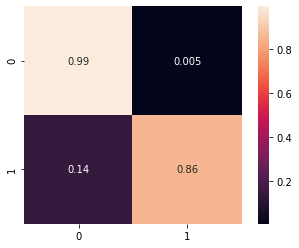

In [53]:
cv = cross_val_score(bernoulli_nb, X_train, y_train, cv=10)
print(bernoulli_nb,":")
print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
bernoulli_nb.fit(X_train, y_train)
pred = bernoulli_nb.predict(X_test)
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy: 0.98 (+/- 0.00)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


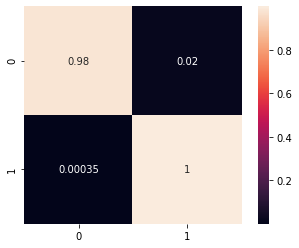

In [54]:
cv = cross_val_score(log_reg, X_train, y_train, cv=10)
print(log_reg,":")
print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)
plt.show()

#Classifier after undersampling

In [55]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_rdmsamp, y_rdmsamp = rus.fit_resample(X, y)

X_rdmsamp = pd.DataFrame(X_rdmsamp, columns = X.columns)

X_num = X_rdmsamp[num_col]
X_cat = X_rdmsamp[cat_col]

X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y_rdmsamp, test_size = 0.2)

sc_x = StandardScaler()
X_train_num_norm = pd.DataFrame(sc_x.fit_transform(X_train_num),columns=X_train_num.columns, index = X_train_num.index)
X_test_num_norm = pd.DataFrame(sc_x.transform(X_test_num),columns=X_test_num.columns, index = X_test_num.index)

X_train = pd.merge(X_train_num_norm, X_train_cat,left_index=True, right_index=True)
X_test = pd.merge(X_test_num_norm, X_test_cat,left_index=True, right_index=True)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True) :
Accuracy: 0.95 (+/- 0.01)


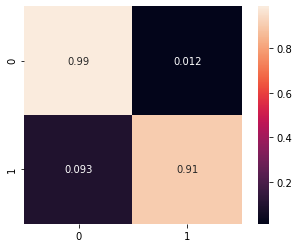

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) :
Accuracy: 0.99 (+/- 0.00)


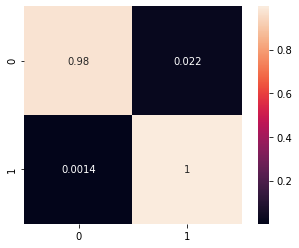

In [56]:
models = (
    BernoulliNB(),
    LogisticRegression()  
)

for m in models :
      cv = cross_val_score(m, X_train, y_train, cv=10)
      print(m, ":")
      print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
      m.fit(X_train, y_train)
      pred = m.predict(X_test)
      cm = confusion_matrix(y_test, pred, normalize="true")
      sns.heatmap(cm, annot=True, square=True)
      plt.show()

#Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Tuning hyper-parameters for precision

{'n_estimators': 200} :
Accuracy: 0.99 (+/- 0.00)


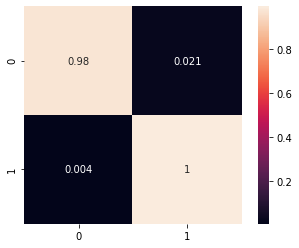

Tuning hyper-parameters for recall

{'n_estimators': 200} :
Accuracy: 0.99 (+/- 0.00)


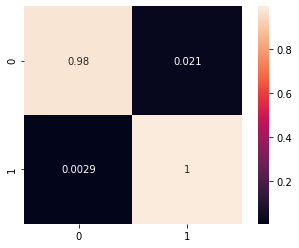

In [58]:
m = RandomForestClassifier()
param_grid = {'n_estimators': [100,200,500,1000]}
scores = ['precision', 'recall']

for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()
    grid = GridSearchCV(m, param_grid, scoring='%s_macro' % score)
    grid.fit(X_train,y_train)
    print(grid.best_params_, ":")
    mean = max(grid.cv_results_['mean_test_score'])
    std = grid.cv_results_['std_test_score'][grid.cv_results_['mean_test_score'].tolist().index(max(grid.cv_results_['mean_test_score']))]
    print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))
    pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, pred, normalize="true")
    sns.heatmap(cm, annot=True, square=True)
    plt.show()

#Model via AdaBoost & GradientBoosting Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

Tuning hyper-parameters for precision

{'learning_rate': 0.1, 'n_estimators': 500} :
Accuracy: 0.99 (+/- 0.00)


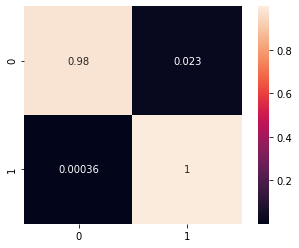

Tuning hyper-parameters for recall

{'learning_rate': 0.1, 'n_estimators': 500} :
Accuracy: 0.99 (+/- 0.00)


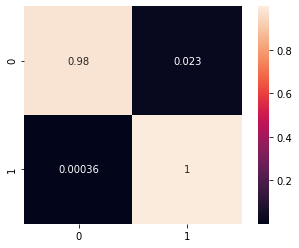

Tuning hyper-parameters for precision

{'learning_rate': 0.01, 'n_estimators': 500} :
Accuracy: 0.99 (+/- 0.00)


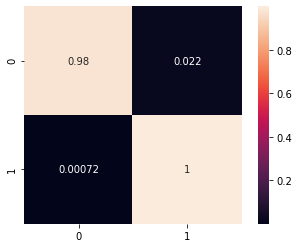

Tuning hyper-parameters for recall

{'learning_rate': 0.01, 'n_estimators': 500} :
Accuracy: 0.99 (+/- 0.00)


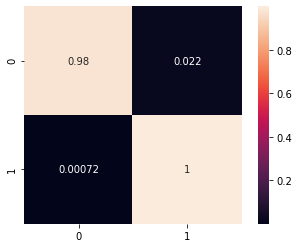

In [60]:
models = [AdaBoostClassifier(), GradientBoostingClassifier()]
param_grid = {'n_estimators' : [100,250,500], 'learning_rate' : [0.1,0.05,0.01]}
scores = ['precision', 'recall']

for m in models:
    for score in scores:
        print("Tuning hyper-parameters for %s" % score)
        print()
        grid = GridSearchCV(m, param_grid, scoring='%s_macro' % score)
        grid.fit(X_train,y_train)
        print(grid.best_params_, ":")
        mean = max(grid.cv_results_['mean_test_score'])
        std = grid.cv_results_['std_test_score'][grid.cv_results_['mean_test_score'].tolist().index(max(grid.cv_results_['mean_test_score']))]
        print("Accuracy: %0.2f (+/- %0.2f)" % (mean, std * 2))
        pred = grid.predict(X_test)
        cm = confusion_matrix(y_test, pred, normalize="true")
        sns.heatmap(cm, annot=True, square=True)
        plt.show()

#XGBoost Classifier

In [0]:
from xgboost import XGBClassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) :
Accuracy: 0.99 (+/- 0.00)


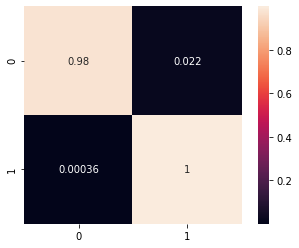

In [62]:
m = XGBClassifier()

cv = cross_val_score(m, X_train, y_train, cv=10)
print(m, ":")
print("Accuracy: %0.2f (+/- %0.2f)" % (cv.mean(), cv.std() * 2))
m.fit(X_train, y_train)
pred = m.predict(X_test)
cm = confusion_matrix(y_test, pred, normalize="true")
sns.heatmap(cm, annot=True, square=True)
plt.show()